# Лабораторная работа 1

1) Классификация данных методом k ближайших соседей (kNN)

2) Классификация данных методом опорных векторов (SVM)

3) Построение softmax-классификатора

Вариант 4: задания 1 и 3 на наборе данных MNIST

Лабораторные работы можно выполнять с использованием сервиса Google Colaboratory (https://medium.com/deep-learning-turkey/google-colab-free-gpu-tutorial-e113627b9f5d) или на локальном компьютере. 

## 1. Классификация данных методом k ближайших соседей ( kNN)

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scripts.data_utils import load_CIFAR10


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) 
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

1.1 Скачайте данные в соответсвии с заданием.

CIFAR-10 по ссылке https://www.cs.toronto.edu/~kriz/cifar.html
или используйте  команду !bash get_datasets.sh (google colab, local ubuntu)

MNIST 
sklearn.datasets import load_digits
digits = load_digits()

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()

In [3]:
cifar10_dir = 'scripts/datasets/cifar-10-batches-py'

try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


1.2 Выведите несколько примеров изображений из обучающей выборки для каждого класса.



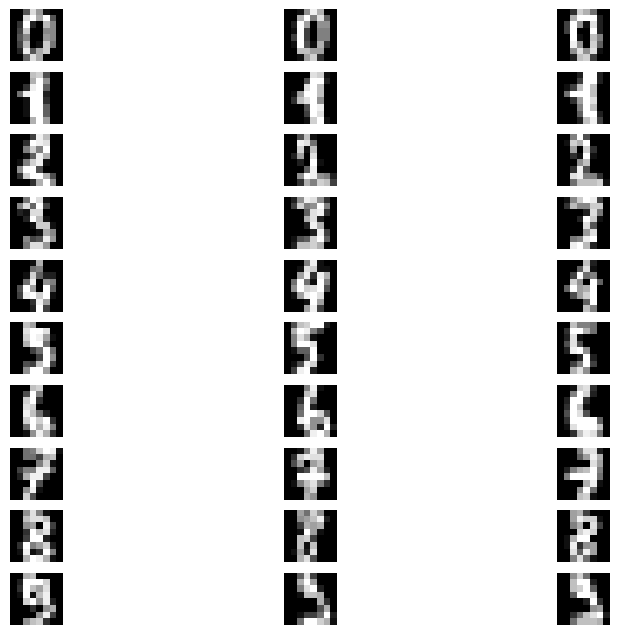

In [4]:
classes = tuple(range(10))
fig, axes = plt.subplots(nrows=len(classes), ncols=3)

for class_number in classes:
    numbers = digits.data[digits.target == class_number]
    class_samples = digits.data[digits.target == class_number]
    ax_row = axes[class_number]
    for i, ax in enumerate(ax_row):
        ax.imshow(numbers[i].reshape(8, 8))
        ax.axis('off')
plt.show()

1.3 Разделите данные на обучающу и тестовую выборки (X_train, y_train, X_test, y_test). Преобразуйте каждое изображение в одномерный массив. 

In [5]:
from sklearn.model_selection import train_test_split

train_proportion = 0.2
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=train_proportion, random_state=1337)

X_test = X_test.reshape(len(X_test), -1)
X_train = X_train.reshape(len(X_train), -1)

1.4 Напишите реализацию классификатора в скрипте /classifiers/k_nearest_neighbor.py и обучите его на сформированной выборке. 

In [6]:
from scripts.classifiers import KNearestNeighbor

max_train = 2500
max_test = int(max_train * train_proportion)

classifier = KNearestNeighbor()
classifier.train(X_train[:max_train], y_train[:max_train])

1.5 Выполните классификацию на тестовой выборке

In [7]:
predictions = classifier.predict_labels(X_test[:max_test], k=3)

1.6 Визуализируйте матрицу расстояний для каждого изображения из тестовой выборки до изображений из обучающей выборки. 


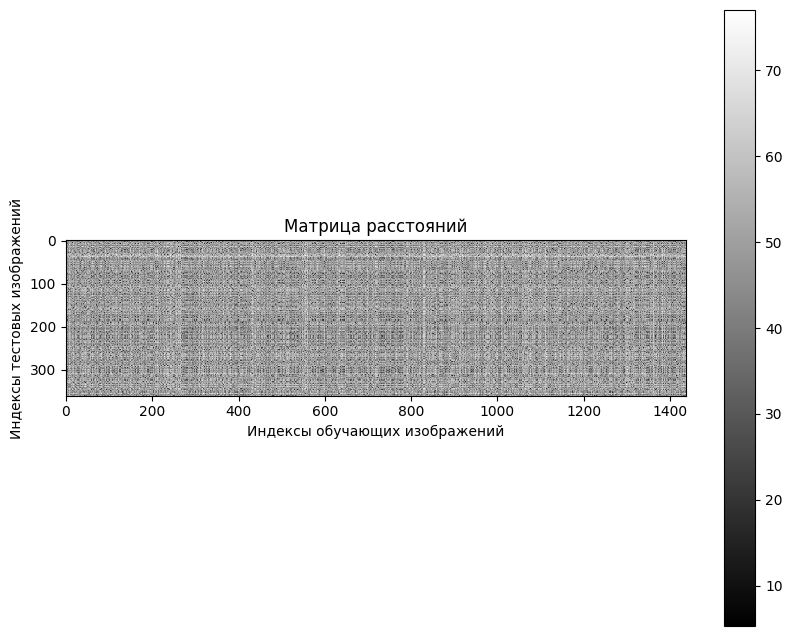

In [8]:
distances = classifier.compute_distances_no_loops(X_test[:max_test])

plt.figure(figsize=(10, 8))
plt.imshow(distances)
plt.colorbar()
plt.title('Матрица расстояний')
plt.xlabel('Индексы обучающих изображений')
plt.ylabel('Индексы тестовых изображений')
plt.show()


1.7 Посчитайте долю правильно классифицированных изображений из тестовой выборки.


In [9]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test[:max_test], predictions)

0.14166666666666666

1.8 Постройте график зависимости доли правильно классифицированных изображений от числа соседей, используемых при классификации.

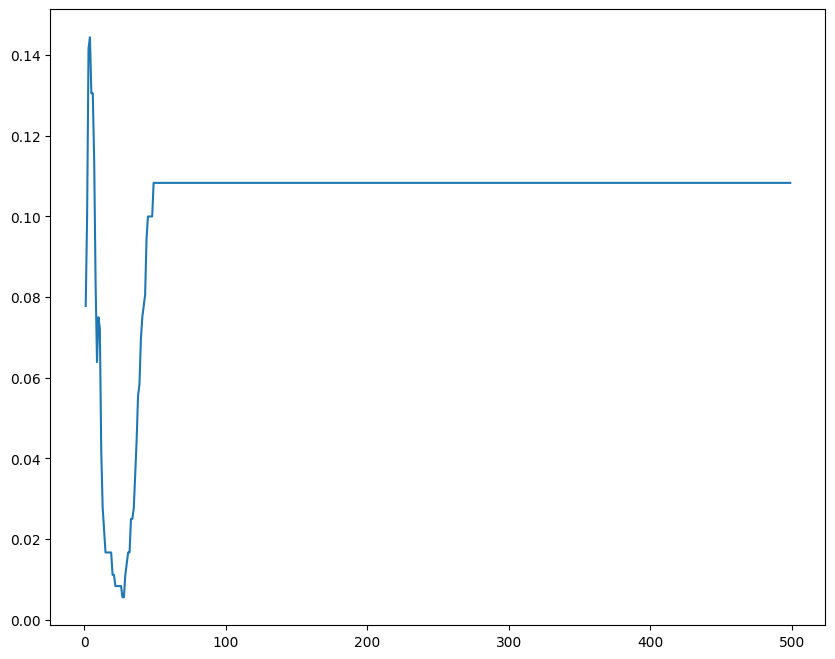

In [10]:
max_neibors = 500
accuracies = [accuracy_score(y_test[:max_test], classifier.predict_labels(X_test[:max_test], k = neibors)) for neibors in range(1, max_neibors)]
plt.plot(range(1, max_neibors), accuracies)

1.9 Выберите лучшее значение параметра k на основе кросс-валидации.


In [11]:
k_with_max_accuracy = np.argmax(accuracies) + 1
k_with_max_accuracy

4


1.10 Переобучите и протестируйте классификатор с использованием выбранного значения k.



In [12]:
classifier.train(X_train, y_train)
predictions = classifier.predict_labels(X_test[:max_test], k=k_with_max_accuracy)
max_accuracy = accuracy_score(y_test, predictions)
max_accuracy

0.14444444444444443

1.11 Сделайте выводы по результатам 1 части задания.

In [13]:
print(f'С ростом количества соседей k до определённого момента растёт точность классификации, затем резко падает, но стабилизируется с дальнейшим ростом k.\nПри k={k_with_max_accuracy} была достигнута максимальная точность {max_accuracy}.\nK nearest neighbor показал низкую эффективность для классификации изображений цифр.')

С ростом количества соседей k до определённого момента растёт точность классификации, затем резко падает, но стабилизируется с дальнейшим ростом k.
При k=4 была достигнута максимальная точность 0.14444444444444443.
K nearest neighbor показал низкую эффективность для классификации изображений цифр.


## 3.  Построение softmax-классификатора

3.1 Разделите данные на обучающую, тестовую и валидационную выборки. Преобразуйте каждое изображение в одномерный массив. Выведите размеры выборок.

In [14]:
validation_proportion = 0.5
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=train_proportion, random_state=1337)

X_test = X_test.reshape(len(X_test), -1)
X_train = X_train.reshape(len(X_train), -1)

X_val_size = int(X_test.shape[0] * validation_proportion)
X_val, X_test = X_test[:X_val_size,:], X_test[X_val_size:,:]
y_val, y_test = y_test[:X_val_size], y_test[X_val_size:]

print(f'Размеры выборок:\nОбучающая: {X_train.shape}\nТестовая: {X_test.shape}\nВалидационная: {X_val.shape}')

Размеры выборок:
Обучающая: (1437, 64)
Тестовая: (180, 64)
Валидационная: (180, 64)


3.2 Проведите предварительную обработку данных, путем вычитания среднего изображения, рассчитанного  по обучающей выборке.

3.3 Чтобы далее не учитывать смещение (свободный член b), добавьте дополнитульную размерность к массиву данных и заполните ее единицами.

[0.00000000e+00 2.95755045e-01 5.12595685e+00 1.18128045e+01
 1.19304106e+01 5.84133612e+00 1.39387613e+00 1.10647182e-01
 5.56715379e-03 1.94989562e+00]


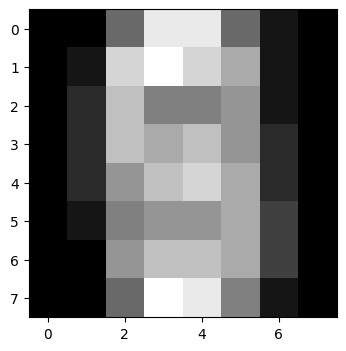

(1437, 65) (180, 65) (180, 65)


In [15]:
mean_image = np.mean(X_train, axis=0)
print(mean_image[:10]) 
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((8,8,1)).astype('uint8')) 
plt.show()


X_train -= mean_image
X_val -= mean_image
X_test -= mean_image



X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])


print(X_train.shape, X_val.shape, X_test.shape)

3.4 Реализуйте функции в classifiers/softmax.py




In [16]:
from scripts.classifiers.softmax import softmax_loss_naive
import time

# Generate a random softmax weight matrix and use it to compute the loss.
W = np.random.randn(65, 10) * 0.0001
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)

# As a rough sanity check, our loss should be something close to -log(0.1).
print('loss: %f' % loss)
print('sanity check: %f' % (-np.log(0.1)))


loss: 2.302788
sanity check: 2.302585


3.5 Убедитесь, что вы верно реализовали расчет градиента, сравнив с реализацией численными методами (код приведен ниже).

In [18]:
loss, grad = softmax_loss_naive(W, X_train, y_train, 0.0)


from scripts.gradient_check import grad_check_sparse
f = lambda w: softmax_loss_naive(w, X_train, y_train, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)


loss, grad = softmax_loss_naive(W, X_train, y_train, 5e1)
f = lambda w: softmax_loss_naive(w, X_train, y_train, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad, 10)

numerical: -0.000338 analytic: -0.000338, relative error: 1.683071e-07
numerical: 0.029148 analytic: 0.029148, relative error: 6.093386e-09
numerical: 0.000365 analytic: 0.000365, relative error: 3.892877e-08
numerical: 0.273990 analytic: 0.273990, relative error: 7.012610e-10
numerical: 0.398049 analytic: 0.398049, relative error: 2.277152e-10
numerical: 0.467851 analytic: 0.467851, relative error: 1.541792e-10
numerical: -0.342969 analytic: -0.342969, relative error: 3.379672e-11
numerical: 0.000615 analytic: 0.000615, relative error: 1.971609e-07
numerical: 0.625053 analytic: 0.625053, relative error: 6.499347e-11
numerical: -0.020591 analytic: -0.020591, relative error: 8.464123e-09
numerical: -2.295552 analytic: -0.237623, relative error: 8.123915e-01
numerical: -1.825182 analytic: -0.008843, relative error: 9.903564e-01
numerical: 2.485639 analytic: 0.732638, relative error: 5.447015e-01
numerical: 0.365944 analytic: -0.022989, relative error: 1.000000e+00
numerical: 1.578045 ana

3.6 Сравните softmax_loss_naive и softmax_loss_vectorized реализации

In [19]:
tic = time.time()
loss_naive, grad_naive = softmax_loss_naive(W, X_train, y_train, 0.000005)
toc = time.time()
print('naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from scripts.classifiers.softmax import softmax_loss_vectorized
tic = time.time()
loss_vectorized, grad_vectorized = softmax_loss_vectorized(W, X_train, y_train, 0.000005)
toc = time.time()
print('vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))


grad_difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('Loss difference: %f' % np.abs(loss_naive - loss_vectorized))
print('Gradient difference: %f' % grad_difference)

naive loss: 2.302788e+00 computed in 0.145246s
vectorized loss: 2.302788e+00 computed in 0.002541s
Loss difference: 0.000000
Gradient difference: 14.427060


3.7 Реализуйте стохастический градиентный спуск в /classifiers/linear_classifier.py . Реализуйте методы train() и predict() и запустите следующий код

3.8 Обучите Softmax-классификатор и оцените accuracy на тестовой выборке.

3.9 С помощью кросс-валидации выберите значения параметров скорости обучения и регуляризации. В кросс-валидации используйте обучающую и валидационную выборки. Оцените accuracy на тестовой выборке.

In [ ]:
learning_rates = [1e-7, 5e-5]
regularization_strengths = [2.5e4, 5e4]

3.10 Сделайте выводы по третьей части задания